In [708]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid")

import os
import warnings
warnings.filterwarnings("ignore")

# setting params
params = {'legend.fontsize': 'medium',
          'figure.figsize': (14, 10),
          'axes.labelsize': 'medium',
          'axes.titlesize':'medium',
          'xtick.labelsize':'medium',
          'ytick.labelsize':'medium'}


sns.set_context('talk')

plt.rcParams.update(params)
pd.options.display.max_colwidth = 60 #(long description)
pd.set_option('display.max_columns', 50)


np.set_printoptions(suppress=True)
pt = np.get_printoptions()['threshold']
np.set_printoptions(precision=3)


pd.set_option('display.max_rows', 50)

pd.set_option('display.width', 100)
    


In [709]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [710]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [711]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [712]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns


In [713]:
missing_values_table(train)

Your selected dataframe has 13 columns.
There are 7 columns that have missing values.


,Missing Values,% of Total Values
Credit_History,50,8.1
Self_Employed,32,5.2
LoanAmount,22,3.6
Dependents,15,2.4
Loan_Amount_Term,14,2.3
Gender,13,2.1
Married,3,0.5


In [714]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [715]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [716]:
test.shape


(367, 12)

In [717]:
train.shape

(614, 13)

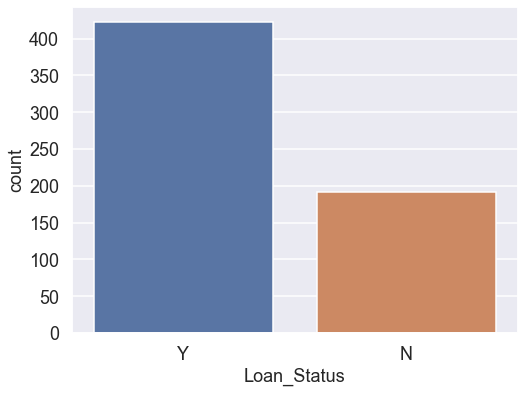

In [718]:
plt.figure(figsize=(8,6))
sns.countplot(train['Loan_Status'])
plt.show()

In [719]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

## Categorical Variables Countplot

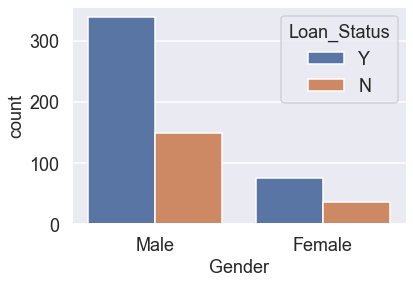

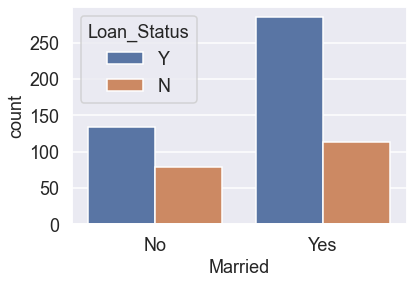

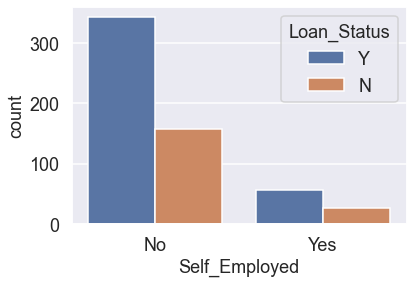

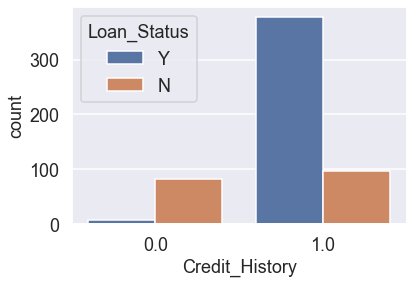

In [720]:
cols=['Gender', 'Married','Self_Employed','Credit_History']
for col in cols:
    plt.figure(figsize=(6,4))
    
    sns.countplot(train[col], hue='Loan_Status', data=train)
    plt.show()

## Ordinal Variables Countplot

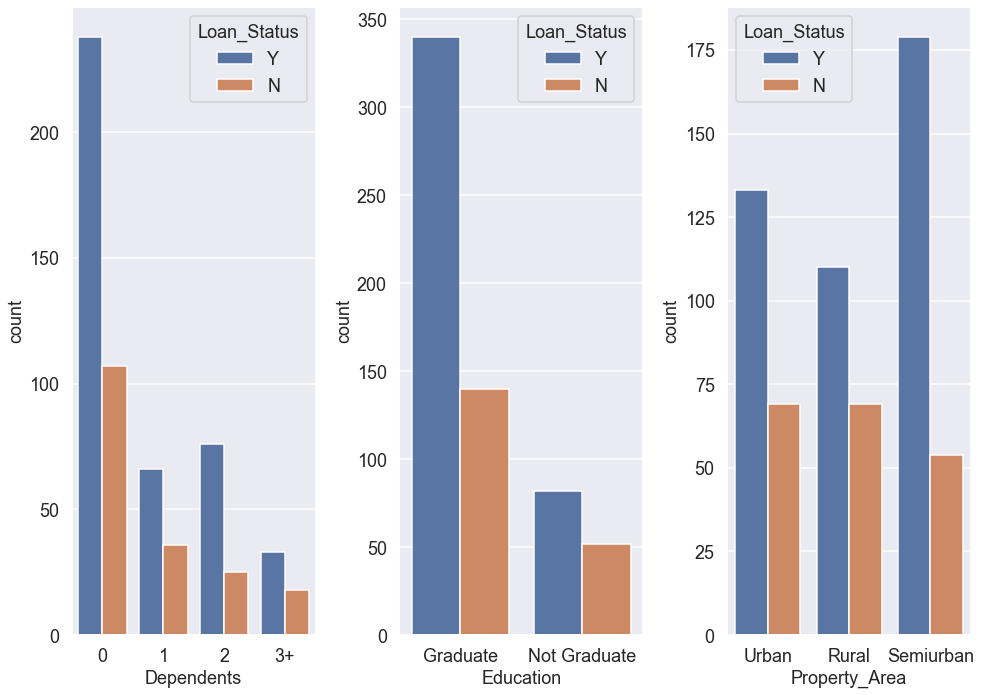

In [721]:

plt.subplot(1,3,1)

sns.countplot(train['Dependents'], hue=train['Loan_Status'])

plt.subplot(1,3,2)

sns.countplot(train['Education'],hue=train['Loan_Status'])


plt.subplot(1,3,3)

sns.countplot(train['Property_Area'],hue=train['Loan_Status'])

plt.tight_layout()

plt.show()

## Numerical Variables

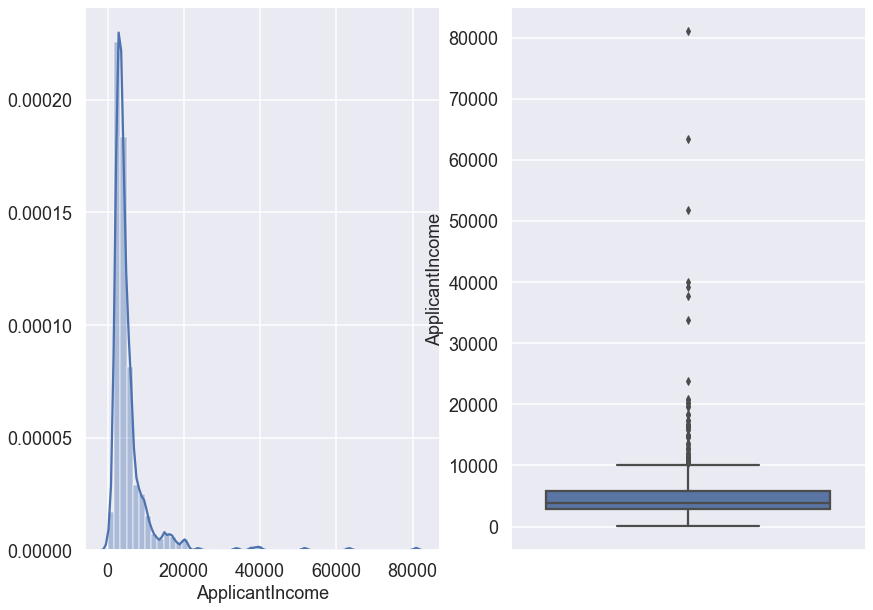

In [722]:


plt.subplot(121)

sns.distplot(train['ApplicantIncome'])

plt.subplot(122)

sns.boxplot(y=train['ApplicantIncome'])
plt.show()

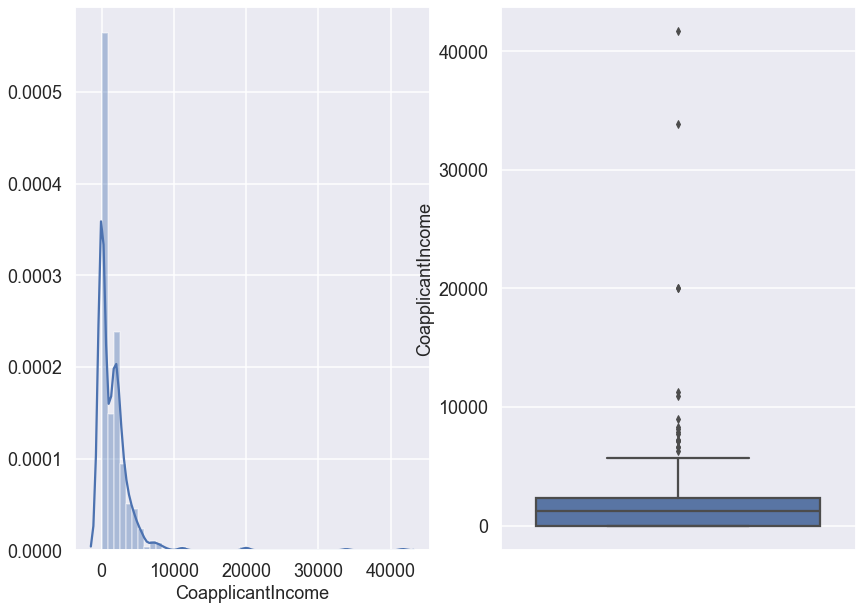

In [723]:


plt.subplot(121)

sns.distplot(train['CoapplicantIncome'])

plt.subplot(122)

sns.boxplot(y=train['CoapplicantIncome'])
plt.show()

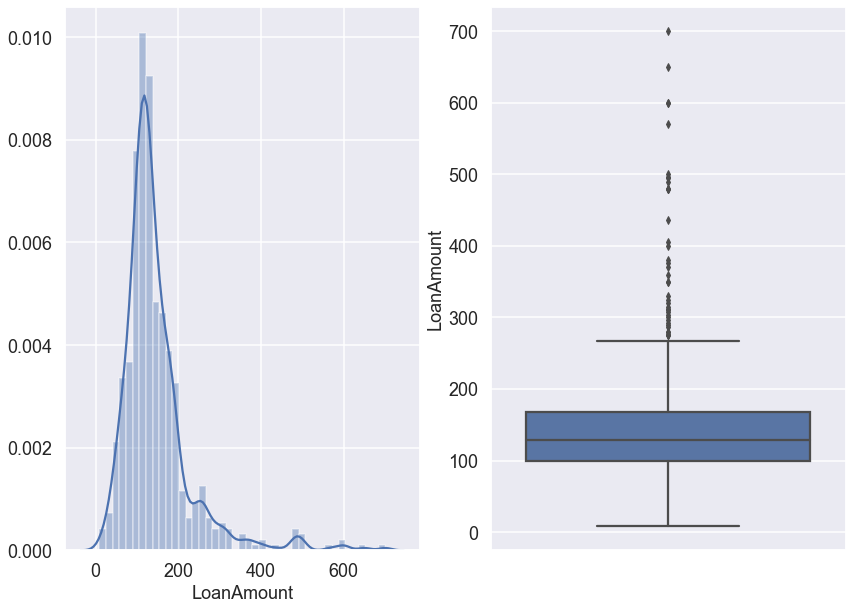

In [724]:


plt.subplot(121)

sns.distplot(train['LoanAmount'])

plt.subplot(122)

sns.boxplot(y=train['LoanAmount'])
plt.show()

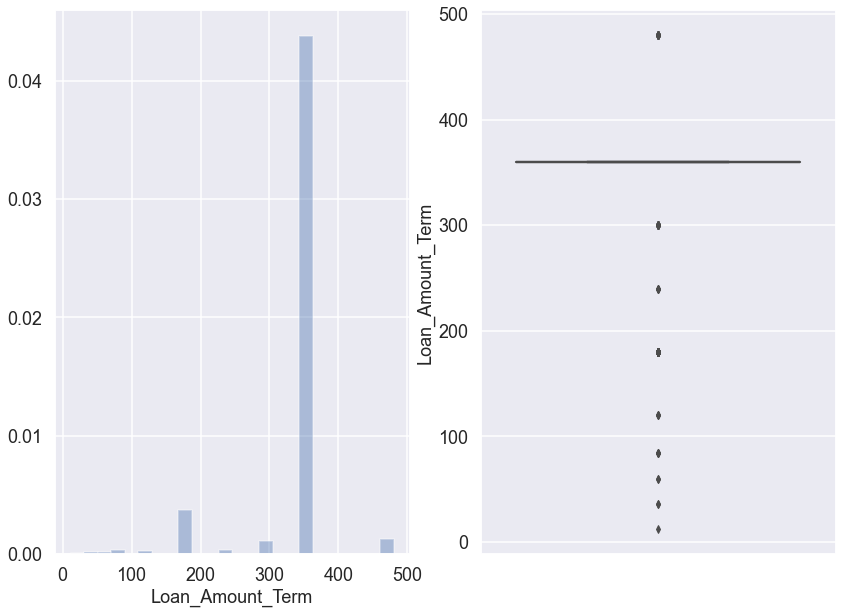

In [725]:


plt.subplot(121)

sns.distplot(train['Loan_Amount_Term'])

plt.subplot(122)

sns.boxplot(y=train['Loan_Amount_Term'])
plt.show()


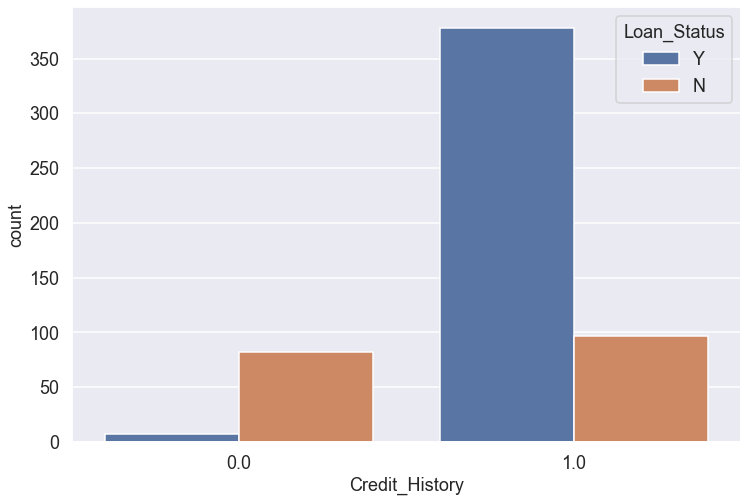

In [726]:
plt.figure(figsize=(12,8))
sns.countplot( x='Credit_History',  hue='Loan_Status', data=train)
plt.show()

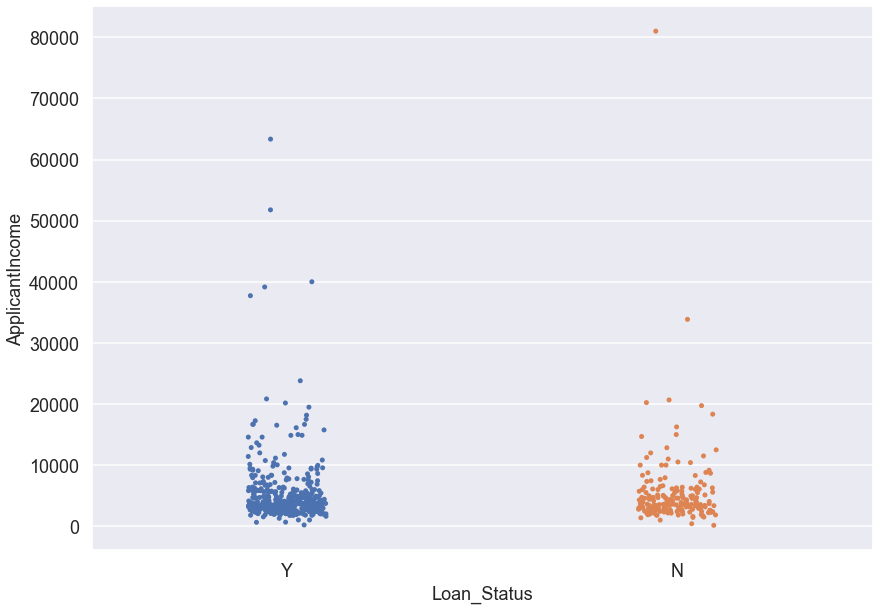

In [727]:
sns.stripplot(x='Loan_Status', y='ApplicantIncome', data=train, jitter=True, dodge=True, split=True)
plt.show()

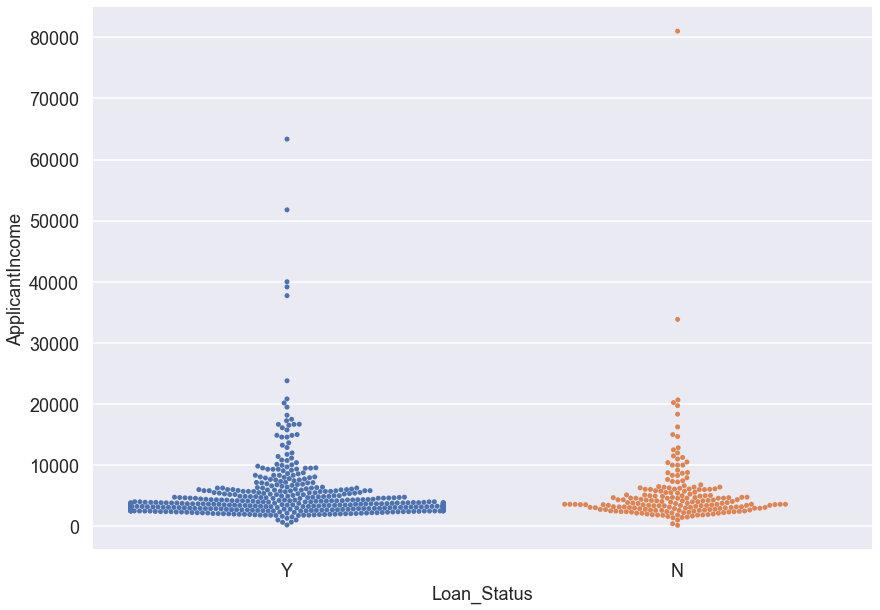

In [728]:
sns.swarmplot(x='Loan_Status', y='ApplicantIncome', data=train)
plt.show()

In [729]:
missing_values_table(test)

Your selected dataframe has 12 columns.
There are 6 columns that have missing values.


,Missing Values,% of Total Values
Credit_History,29,7.9
Self_Employed,23,6.3
Gender,11,3.0
Dependents,10,2.7
Loan_Amount_Term,6,1.6
LoanAmount,5,1.4


In [730]:
df.Education.value_counts()

1    763
0    218
Name: Education, dtype: int64

## Converting Categorical Variables to Numerical Values

In [731]:
train['Gender']=train.Gender.map({'Male':1, 'Female':0})

train['Married']=train.Married.map({'Yes':1,'No':0 })

train['Dependents']=train.Dependents.map({'0':0, '1':1, '2':2, '3+':3})

train['Education']=train['Education'].map({'Graduate':1, 'Not Graduate':0})

train['Self_Employed']=train['Self_Employed'].map({'Yes':1, 'No':0})

train['Property_Area']=train['Property_Area'].map({'Rural':1, 'Semiurban':2, 'Urban':3})

train['Loan_Status']=train['Loan_Status'].map({'Y':1, 'N':0})


In [732]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    float64
 2   Married            611 non-null    float64
 3   Dependents         599 non-null    float64
 4   Education          614 non-null    int64  
 5   Self_Employed      582 non-null    float64
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int64  
dtypes: float64(8), int64(4), object(1)
memory usage: 62.5+ KB


In [733]:
test['Gender']=test.Gender.map({'Male':1, 'Female':0})

test['Married']=test.Married.map({'Yes':1,'No':0 })

test['Dependents']=test.Dependents.map({'0':0, '1':1, '2':2, '3+':3})

test['Education']=test['Education'].map({'Graduate':1, 'Not Graduate':0})

test['Self_Employed']=test['Self_Employed'].map({'Yes':1, 'No':0})

test['Property_Area']=test['Property_Area'].map({'Rural':1, 'Semiurban':2, 'Urban':3})



In [734]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1.0,1,0.0,1,0.0,5720,0,110.0,360.0,1.0,3
1,LP001022,1.0,1,1.0,1,0.0,3076,1500,126.0,360.0,1.0,3
2,LP001031,1.0,1,2.0,1,0.0,5000,1800,208.0,360.0,1.0,3
3,LP001035,1.0,1,2.0,1,0.0,2340,2546,100.0,360.0,NaN,3
4,LP001051,1.0,0,0.0,0,0.0,3276,0,78.0,360.0,1.0,3


## Imputation

In [735]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [736]:
cols=['Gender','Married','Dependents','Self_Employed','Credit_History','Loan_Amount_Term']
for col in cols:
    train[col]=train[col].fillna(train[col].mode()[0])
    
    



In [737]:
for col in cols:
    test[col]=test[col].fillna(test[col].mode()[0])

In [738]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           5
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [739]:
missing_values_table(train)

Your selected dataframe has 13 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
LoanAmount,22,3.6


In [740]:
train['LoanAmount']=train['LoanAmount'].fillna(train['LoanAmount'].median())
test['LoanAmount']=test['LoanAmount'].fillna(test['LoanAmount'].median())

In [741]:
missing_values_table(train)

missing_values_table(test)

Your selected dataframe has 13 columns.
There are 0 columns that have missing values.
Your selected dataframe has 12 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


## Scaling

In [742]:

from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [743]:
train_scale=train[['ApplicantIncome','CoapplicantIncome','LoanAmount']]

In [744]:
train_scale=scaler.fit_transform(train_scale)

In [745]:
train_scale=pd.DataFrame(train_scale, columns=['ApplicantIncome','CoapplicantIncome','LoanAmount'])

In [746]:
train[['ApplicantIncome','CoapplicantIncome','LoanAmount']]=train_scale

In [747]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0.0,1,0.0,0.072991,-0.554487,-0.211241,360.0,1.0,3,1
1,LP001003,1.0,1.0,1.0,1,0.0,-0.134412,-0.038732,-0.211241,360.0,1.0,1,0
2,LP001005,1.0,1.0,0.0,1,1.0,-0.393747,-0.554487,-0.948996,360.0,1.0,3,1
3,LP001006,1.0,1.0,0.0,0,0.0,-0.462062,0.251980,-0.306435,360.0,1.0,3,1
4,LP001008,1.0,0.0,0.0,1,0.0,0.097728,-0.554487,-0.056551,360.0,1.0,3,1


In [748]:
test_scale=test[['ApplicantIncome','CoapplicantIncome','LoanAmount']]

In [749]:
test_scale=scaler.transform(test_scale)

In [750]:
test_scale=pd.DataFrame(test_scale, columns=['ApplicantIncome','CoapplicantIncome','LoanAmount'])

In [751]:
test[['ApplicantIncome','CoapplicantIncome','LoanAmount']]=test_scale

In [752]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1.0,1,0.0,1,0.0,0.051857,-0.554487,-0.425428,360.0,1.0,3
1,LP001022,1.0,1,1.0,1,0.0,-0.381297,-0.041468,-0.235040,360.0,1.0,3
2,LP001031,1.0,1,2.0,1,0.0,-0.066097,0.061136,0.740701,360.0,1.0,3
3,LP001035,1.0,1,2.0,1,0.0,-0.501872,0.316278,-0.544421,360.0,1.0,3
4,LP001051,1.0,0,0.0,0,0.0,-0.348532,-0.554487,-0.806205,360.0,1.0,3


## Train-Test Split

In [753]:
train_cat=train.drop(columns=['Loan_ID','ApplicantIncome','CoapplicantIncome','LoanAmount', 'Loan_Status'])
train_num=train[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Status']]



## Chi2 Test

In [754]:
from sklearn.feature_selection import chi2, SelectKBest

In [755]:
skb=SelectKBest(chi2, k='all').fit(train_cat, y)

In [756]:
features = train_cat.columns[skb.get_support()]
print(features)

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Loan_Amount_Term',
       'Credit_History', 'Property_Area'],
      dtype='object')


In [757]:
feature_scores = [(item, score) for item, score in zip(train_cat, skb.scores_)]
sorted(feature_scores, key=lambda x: -x[1])

[('Credit_History', 26.00587715338899),
 ('Loan_Amount_Term', 3.778553724653287),
 ('Married', 1.7824249851280132),
 ('Education', 0.9883902711953642),
 ('Property_Area', 0.19239205791764574),
 ('Dependents', 0.08595275873631475),
 ('Gender', 0.036234308421920616),
 ('Self_Employed', 0.007284803298269976)]

In [758]:
feature_scores=sorted(feature_scores, key=lambda x: -x[1])

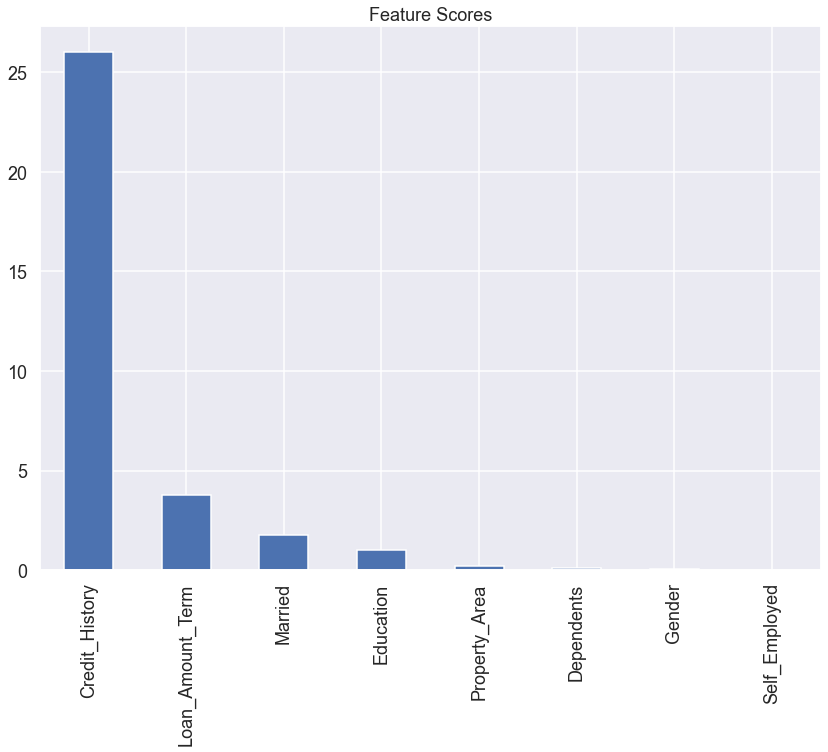

In [759]:
score=list(zip(*feature_scores))


feature_scores = pd.Series(score[1], index=score[0] )
feature_scores.sort_values(ascending = False , inplace = True)

plt.title('Feature Scores')
feature_scores.plot.bar()
plt.show()

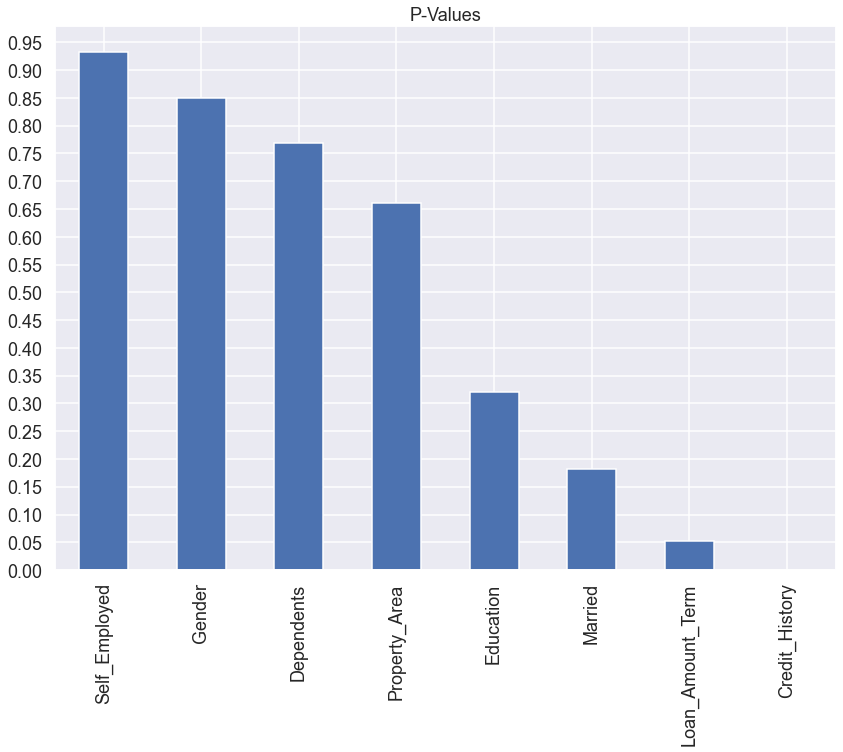

In [760]:
#Pvalue
chiscore=chi2(train_cat,y)
pscore=sorted(chiscore[1])

p_values = pd.Series(pscore, index=score[0])
p_values.sort_values(ascending = False , inplace = True)


plt.title('P-Values')
p_values.plot.bar()
plt.yticks(np.arange(0,1, 0.05))

plt.show()

## Kendall  Test

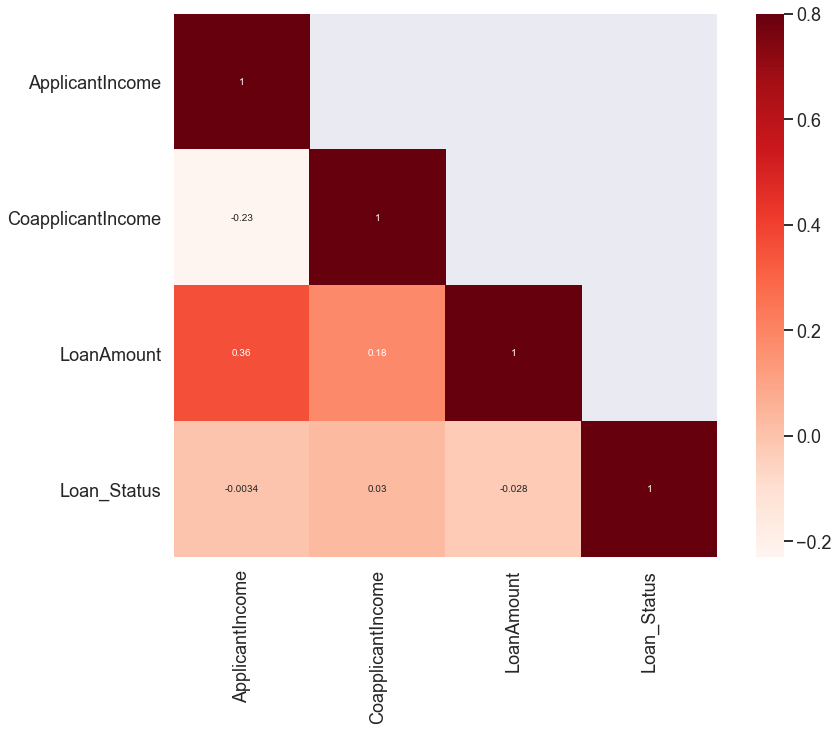

In [761]:
cor=train_num.corr(method='kendall')

mask=np.array(cor)
mask[np.tril_indices_from(mask)] = False

sns.heatmap(cor, annot=True,mask=mask, vmax=.8, square=True, cmap='Reds', annot_kws={'size':10})

plt.show()


In [762]:
X=train.drop(columns=['Loan_ID','Loan_Status','Self_Employed','Gender','Dependents','Property_Area'])
y=train.Loan_Status

In [763]:
from sklearn.model_selection import train_test_split


X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.1,random_state=42, stratify=y)

## Logistic Regression

In [764]:
from sklearn.linear_model import LogisticRegression

In [765]:
log=LogisticRegression(random_state=0, solver='liblinear', C=1)

In [766]:
log.fit(X_train,y_train)

LogisticRegression(C=1, random_state=0, solver='liblinear')

In [767]:
prediction=log.predict(X_val)

In [768]:
from sklearn.metrics import classification_report, confusion_matrix

In [769]:
# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_val, prediction))
conf_mat = confusion_matrix(y_val, prediction)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

           0       0.90      0.47      0.62        19
           1       0.81      0.98      0.88        43

    accuracy                           0.82        62
   macro avg       0.85      0.73      0.75        62
weighted avg       0.84      0.82      0.80        62

Confusion matrix:
 [[ 9 10]
 [ 1 42]]


### SMOTE

In [770]:
from imblearn.over_sampling import SMOTE

In [771]:
smote=SMOTE()

In [772]:
X_smote, y_smote = smote.fit_sample(X_train, y_train)

In [773]:
log.fit(X_smote,y_smote)

LogisticRegression(C=1, random_state=0, solver='liblinear')

In [774]:
prediction=log.predict(X_val)

In [775]:
# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_val, prediction))
conf_mat = confusion_matrix(y_val, prediction)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

           0       0.67      0.53      0.59        19
           1       0.81      0.88      0.84        43

    accuracy                           0.77        62
   macro avg       0.74      0.71      0.72        62
weighted avg       0.77      0.77      0.77        62

Confusion matrix:
 [[10  9]
 [ 5 38]]


## SVM

In [776]:
X=train.drop(columns=['Loan_ID','Loan_Status','Self_Employed','Gender','Dependents','Property_Area'])
y=train.Loan_Status

In [777]:
from sklearn.model_selection import train_test_split


X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.1,random_state=42, stratify=y)

In [778]:
from sklearn.svm import SVC 

In [779]:
svc=SVC(kernel="rbf", gamma=1, C=1)

In [780]:
svc.fit(X_train,y_train)

SVC(C=1, gamma=1)

In [781]:
prediction=svc.predict(X_val)

In [782]:
# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_val, prediction))
conf_mat = confusion_matrix(y_val, prediction)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

           0       0.90      0.47      0.62        19
           1       0.81      0.98      0.88        43

    accuracy                           0.82        62
   macro avg       0.85      0.73      0.75        62
weighted avg       0.84      0.82      0.80        62

Confusion matrix:
 [[ 9 10]
 [ 1 42]]


In [783]:
test.drop(columns='Loan_ID', inplace=True)

In [784]:
test=test.drop(columns=['Self_Employed','Gender','Dependents','Property_Area'])
pred_test=svc.predict(test)

In [785]:
submission=pd.read_csv('sample_submission.csv')

In [786]:
submission['Loan_Status']=pred_test

In [788]:
submission['Loan_Status']=submission['Loan_Status'].map({0:'N',1:'Y'})

In [789]:
submission.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [698]:
submission.to_csv('submission.csv', index=False)

In [790]:

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_score, KFold

In [791]:
cv=KFold(n_splits=5, random_state=1, shuffle=True)

In [792]:
scores=cross_val_score(log, X_train, y_train, cv=cv)

In [793]:
scores

array([0.766, 0.883, 0.818, 0.773, 0.809])

In [794]:
(0.766+ 0.883+0.818+ 0.773+ 0.809)/5

0.8098000000000001